# Requirements
For this tutorial, you will need `python >= 3.9`.

Make sure to install `spatialdata_io >= 0.0.7` and `spatialdata_xenium_explorer >= 0.1.5`, i.e.:
```sh
pip install spatialdata-io
pip install spatialdata_xenium_explorer
```

In [1]:
import spatialdata_io
import spatialdata_xenium_explorer

# 1. Download tutorial data

This tutorial is based on a Visium sample of colon cancer, which can be downloaded on this [10x Genomics webpage](https://www.10xgenomics.com/datasets/visium-cytassist-gene-expression-libraries-of-post-xenium-human-colon-cancer-ffpe-using-the-human-whole-transcriptome-probe-set-2-standard).
In particular, download the following files inside the same directory:
- [Feature / barcode matrix HDF5 (filtered)](https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1/CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_filtered_feature_bc_matrix.h5)
- [Spatial imaging data](https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1/CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_spatial.tar.gz) (unzip it)

# 2. Read the Visium data

In [2]:
# directory containing the Visium data you downloaded
data_path = "visium_data_directory"

# where the "Xenium Explorer files" will be created
explorer_path = "visium_data_directory.explorer"

The Visium data can be read by `spatialdata-io`:

In [ ]:
sdata = spatialdata_io.visium(data_path)

In [4]:
sdata

SpatialData object with:
├── Images
│     ├── 'CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_hires_image': SpatialImage[cyx] (3, 2000, 1535)
│     └── 'CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_lowres_image': SpatialImage[cyx] (3, 600, 461)
├── Shapes
│     └── 'CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1': GeoDataFrame shape: (6518, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 6518 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial': AnnData (6518, 18085)
with coordinate systems:
▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_hires_image (Images), CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1 (Shapes)
▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_lowres_image (Images), CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1 (Shapes)
▸ 'global', with elements:

Now, `sdata` is a `SpatialData` object. Refer to the [`spatialdata` documentation](https://spatialdata.scverse.org/en/latest/) to manipulate this object, if desired.

# 3. Transform it into Xenium Explorer files

To convert your `SpatialData` object into Xenium Explorer files, you have two choices:
- Use the `spatialdata_xenium_explorer` API, as below
- Use the `spatialdata_xenium_explorer` CLI, as detailed [here](https://quentinblampey.github.io/spatialdata_xenium_explorer/cli/). In particular, consider using the `spatialdata_xenium_explorer write` command.

In [6]:
# we choose the name of the image that will be displayed by the explorer
image_key = 'CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_hires_image'

spatialdata_xenium_explorer.write(explorer_path, sdata, image_key=image_key, spot=True)

[INFO] (spatialdata_xenium_explorer.core.table) Writing table with 18085 columns
[INFO] (spatialdata_xenium_explorer.core.table) Writing 1 cell categories: region
[INFO] (spatialdata_xenium_explorer.core.shapes) Writing 6518 cell polygons
[INFO] (spatialdata_xenium_explorer.core.points) Writing 18085 transcripts
[INFO] (spatialdata_xenium_explorer.core.points)    > Level 0: 18085 transcripts
[INFO] (spatialdata_xenium_explorer.core.points)    > Level 1: 4521 transcripts
[INFO] (spatialdata_xenium_explorer.core.images) Writing multiscale image with procedure=semi-lazy (load in memory when possible)
[INFO] (spatialdata_xenium_explorer.core.images)    (Loading image of shape (3, 2000, 1535)) in memory
[INFO] (spatialdata_xenium_explorer.core.images)    > Image of shape (3, 2000, 1535)
[INFO] (spatialdata_xenium_explorer.core.images)    > Image of shape (3, 1000, 767)
[INFO] (spatialdata_xenium_explorer.core.images)    > Image of shape (3, 500, 383)
[INFO] (spatialdata_xenium_explorer.core

# 4. Use the Xenium Explorer

The Xenium Explorer can be downloaded freely [here](https://www.10xgenomics.com/support/software/xenium-explorer/latest).
Once installed, double-click on the `experiment.xenium` file that has been created above, and it will open your Visium data in the Xenium Explorer.
  
### Showing gene expressions

Using the Xenium Explorer, it is possible to show the gene expression per spot, denoted as "Transcript Density Map" in the software. To effectively display transcript counts per spot, activate the "Cells" panel, and under the "Cell color" dropdown, select "Transcript Density Map". Note that, in the example below, the scale of the color map goes from 1 to 9000 transcript count.

> Note that the "Cells" panel actually display spots, not cells. This is because the Xenium Explorer has been designed for Xenium data, which has a single-cell resolution.

<img src="assets/visium/density_map.png" alt="image" width="800" height="auto">

We can also choose a subset of genes, and it will update the density map. Here, we updated the scale of the color map under the "Cells" panel, which goes from 1 to 10 transcript count.

<img src="assets/visium/transcripts_subset.png" alt="image" width="800" height="auto">

> Note that we recommend keeping the "Transcripts" panel disabled since the Visium machine is spot-based. Still, you can select the genes you are interested in, and it will adapt the density map without actually enabling the "Transcripts" panel.

### Showing spot groups (e.g., clusters)

If you have categorical columns under `sdata.table.obs`, you can show it by selecting the right group under the "Cell groups" dropdown. Ensure that "Cell color" is set to "Cluster Affiliation". In this example, we run `Leiden` clustering using `scanpy` (see the last section of this tutorial).

<img src="assets/visium/clusters.png" alt="image" width="800" height="auto">

### One-spot information

You can also click on one spot to get extra details about this single spot.

<img src="assets/visium/one_spot.png" alt="image" width="800" height="auto">

### Lasso selection

On the Xenium Explorer, use the Lasso tool to select some spots of interest. Then, click on "Download Cell Stats as CSV", as below. It will create a file called `"Selection_1_cells_stats.csv"`.

<img src="assets/visium/lasso.png" alt="image" width="800" height="auto">

In [10]:
import pandas as pd
import numpy as np
import scanpy as sc

# add the path to the file that you downloaded, e.g. "Selection_1_cells_stats.csv"
df_selection = pd.read_csv("Selection_1_cells_stats.csv", skiprows=2)

# this line converts the Xenium spot ID into a spot index
spot_indices = df_selection["Cell ID"].map(spatialdata_xenium_explorer.utils.int_cell_id).values

sdata.table.obs["lasso"] = pd.Categorical(
    np.where(np.isin(np.arange(sdata.table.n_obs), spot_indices), "selected", "not-selected")
)

Now, `sdata.table.obs["lasso"]` denotes which cells have been selected by the lasso tool (either "selected" or "not-selected").

We can then use `spatialdata_plot` to display the cells that were selected by the lasso tool. Make sure to install `spatialdata_plot >= 0.1.0`, e.g. via `pip install spatialdata_plot`. Now, we can render the shapes (i.e., the spots) and colour them based on the `"lasso"` column that was saved in `sdata.table.obs`:

In [6]:
import spatialdata_plot

/Users/quentinblampey/Library/Caches/pypoetry/virtualenvs/spatialdata-xenium-explorer-yAxRBYoR-py3.9/lib/python3.9/site-packages/spatialdata/_core/query/relational_query.py:198: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical = pd.api.types.is_categorical_dtype(value)
/Users/quentinblampey/Library/Caches/pypoetry/virtualenvs/spatialdata-xenium-explorer-yAxRBYoR-py3.9/lib/python3.9/site-packages/spatialdata/_utils.py:209: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical = pd.api.types.is_categorical_dtype(obs[column])
/Users/quentinblampey/Library/Caches/pypoetry/virtualenvs/spatialdata-xenium-explorer-yAxRBYoR-py3.9/lib/python3.9/site-packages/spatialdata/_utils.py:212: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  obs

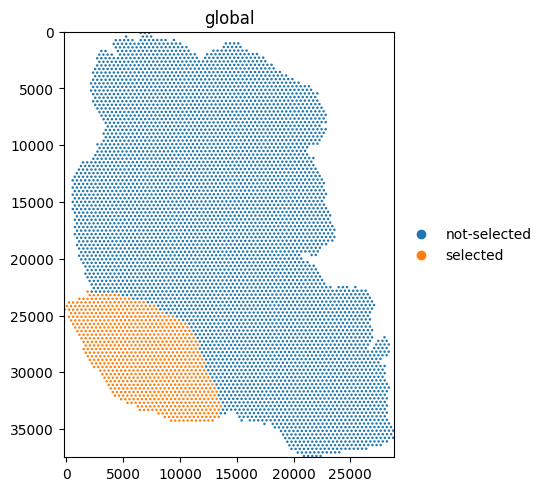

In [11]:
sdata.pl.render_shapes(color="lasso").pl.show("global")

### Update the cell categories

Here, we run some Leiden clustering with `scanpy`. Then, we will update the Xenium Explorer files to display the spot clusters.

More generally, you can add new cell categories, i.e. a column of `sdata.table.obs`, and the Xenium Explorer will show it after the instructions below.

> Note that we only display categorical columns. If a column from `sdata.table.obs` contains continuous numerical values (e.g., `3.13, 7.89, ...`), it will not be transformed into a categorical variable, and therefore not shown in the Xenium Explorer. In this case, we recommend using `spatiadata_plot` as shown above.

In [ ]:
import scanpy as sc

sc.pp.normalize_total(sdata.table)
sc.pp.log1p(sdata.table)
sc.pp.pca(sdata.table)
sc.pp.neighbors(sdata.table)
sc.tl.leiden(sdata.table)

Now, you can update the explorer with your new cluster assignment. You don't need to re-run the complete conversion; you can edit the `analysis.zarr.zip` file only, as below.

> Alternatively, you can use the `spatialdata_xenium_explorer` CLI instead of the API, as detailed [here](https://quentinblampey.github.io/spatialdata_xenium_explorer/cli/#update-obs).

In [10]:
spatialdata_xenium_explorer.write_cell_categories(explorer_path, sdata.table)

[INFO] (spatialdata_xenium_explorer.core.table) Writing 3 cell categories: region, lasso, leiden


To visualize these clusters, re-open the `experiment.xenium` file and select the new `"leiden"` cell group (under the "Cells" panel and in the "Cell groups" dropdown). See the examples above to see how it looks on the Xenium Explorer.